<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC12x**

# **Statistics**

## **Part 1. Bayes Theorem**

Bayes Thoerem은 사전확률에서 정보가 업데이트됨에 따라 사후확률이 어떻게 변화하는지를 나타냅니다. 

다음의 문제에 대해 Bayes Thoerem을 활용하여 사후확률을 구해보세요.

> 여러분은 가게에서 2개의 사탕팩(A, B)을 구매하였습니다. A팩에는 7개의 딸기맛, 3개의 사과맛 사탕이 들어있고, B팩에는 5개의 딸기맛, 5개의 사과맛 사탕이 들어있었습니다. 해당 사탕들을 모두 섞은 후 1개를 뽑았더니 딸기맛이었을 때, 해당 사탕이 A팩에 있었던 사탕이었을 확률은 얼마일까요?





##### **Q1. 사후확률을 반올림하여 소수점 둘째 자리까지 구한 후, 사전확률과 사후확률 결과를 (사전확률, 사후확률)의 형태로 쓰세요.**

In [31]:
# 이곳에 코드를 작성하세요.

import pandas as pd
import scipy.stats as st
from scipy.stats import t
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


As = 0.7  # A에서 딸기맛 확률
Bs = 0.5  # B에서 딸기맛 확률
Straw = 12/20 # 딸기 확률
A = 0.5 # A를 뽑을 확률
B = 1 - A # B를 뽑을 확률

print(A)

# 꺼낸게 딸기었을 때 A일 확률
PA = As*A / Straw
print(PA)



0.5
0.5833333333333334


In [32]:
# (0.5,0.58)

---

## **Part 2. 큰 수의 법칙 & 신뢰 구간**

> **Part 2, Part 3에서 여러분은 가상의 마케팅 데이터를 활용할 것입니다.**

#### 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다루고 있으며, 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Country - 고객의 국적
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)

In [5]:
df = pd.read_csv('sc_12_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,...,104,379,111,189,218,1,4,6,1,0
1,1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,...,5,64,7,0,37,1,7,7,5,0
2,2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,...,11,59,15,2,30,1,3,5,2,0
3,3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,...,0,1,0,0,0,1,1,2,7,0
4,4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,...,16,24,11,0,34,2,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2183,9977,1973,US,Graduation,Divorced,"$78,901.00",0,1,9/17/13,...,11,309,33,26,34,3,9,5,4,0
2136,2184,10142,1976,US,PhD,Divorced,"$66,476.00",0,1,3/7/13,...,18,126,47,48,78,2,5,11,4,0
2137,2185,5263,1977,SP,2n Cycle,Married,"$31,056.00",1,0,1/22/13,...,10,13,3,8,16,1,1,3,8,0
2138,2186,22,1976,SP,Graduation,Divorced,"$46,310.00",1,0,12/3/12,...,2,88,15,5,14,2,6,5,8,0


In [6]:
df_clean = df.drop(df.columns[0], axis=1)
df_clean

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,9977,1973,US,Graduation,Divorced,"$78,901.00",0,1,9/17/13,99,...,11,309,33,26,34,3,9,5,4,0
2136,10142,1976,US,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,...,18,126,47,48,78,2,5,11,4,0
2137,5263,1977,SP,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,...,10,13,3,8,16,1,1,3,8,0
2138,22,1976,SP,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,...,2,88,15,5,14,2,6,5,8,0


### **2-1. 데이터셋 살펴보기**

- 데이터셋을 데이터프레임 형태로 불러오세요.
- `Income` column 이름 앞뒤의 공백을 제거하세요.
- 데이터셋의 결측치를 살펴보고, 있다면 제거하고 인덱스를 재설정하세요.
- `Income`의 데이터타입을 `int`로 변경하세요.
  - 필요시 다음의 코드를 활용해보세요.
  

  ```python
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))
  
    df['Income'] = li
  ```

- `Income`의 이상치를 제거하세요.
  - 다음의 코드를 통해 `Income`의 분포를 비교해보세요.

  ```python
  plt.hist(df['Income']);

  plt.hist(df.loc[df['Income'] < 120000, 'Income']);
  ```

  - `Income`이 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.

- 위의 전처리 과정을 완료한 데이터프레임을 `df_final` 변수로 저장하세요.

In [7]:
import re

print(df_clean.columns)
df_clean = df_clean.rename(columns={' Income ':'Income'})
print(df_clean.columns)

Index(['ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status',
       ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')


In [8]:
df_clean1 = df_clean.dropna().reset_index()
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2119 non-null   int64 
 1   ID                 2119 non-null   int64 
 2   Year_Birth         2119 non-null   int64 
 3   Country            2119 non-null   object
 4   Education          2119 non-null   object
 5   Marital_Status     2119 non-null   object
 6   Income             2119 non-null   object
 7   Kidhome            2119 non-null   int64 
 8   Teenhome           2119 non-null   int64 
 9   Dt_Customer        2119 non-null   object
 10  Recency            2119 non-null   int64 
 11  MntWines           2119 non-null   int64 
 12  MntFruits          2119 non-null   int64 
 13  MntMeatProducts    2119 non-null   int64 
 14  MntFishProducts    2119 non-null   int64 
 15  MntSweetProducts   2119 non-null   int64 
 16  MntGoldProds       2119 non-null   int64 


In [9]:
splited = df_clean1['Income'].str.split('.', expand=True)
clean = splited[0].str.replace('$','')
clean2 = clean.str.replace(',','').astype('int')

df_clean1['Income'] = clean2


<ipython-input-9-760d9e592454>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean = splited[0].str.replace('$','')


In [10]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2119 non-null   int64 
 1   ID                 2119 non-null   int64 
 2   Year_Birth         2119 non-null   int64 
 3   Country            2119 non-null   object
 4   Education          2119 non-null   object
 5   Marital_Status     2119 non-null   object
 6   Income             2119 non-null   int64 
 7   Kidhome            2119 non-null   int64 
 8   Teenhome           2119 non-null   int64 
 9   Dt_Customer        2119 non-null   object
 10  Recency            2119 non-null   int64 
 11  MntWines           2119 non-null   int64 
 12  MntFruits          2119 non-null   int64 
 13  MntMeatProducts    2119 non-null   int64 
 14  MntFishProducts    2119 non-null   int64 
 15  MntSweetProducts   2119 non-null   int64 
 16  MntGoldProds       2119 non-null   int64 


0       84835
1       57091
2       67267
3       32474
4       21474
        ...  
2114    78901
2115    66476
2116    31056
2117    46310
2118    65819
Name: Income, Length: 2119, dtype: int64

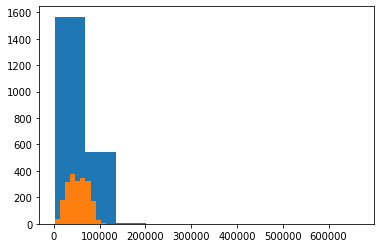

In [11]:
plt.hist(df_clean1['Income']);

plt.hist(df_clean1.loc[df_clean1['Income'] < 120000, 'Income']);
Income = df_clean1.iloc[:,6]
Income

In [12]:
dropindex = Income[Income >= 120000].index
df_final = df_clean1.drop(dropindex)

##### **Q2. `df_final`의 행의 개수를 쓰세요.**

In [13]:
# 아래의 코드를 실행해 주세요. 업그레이드 완료 후에는 런타임을 재시작해야 합니다. 
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [14]:
# 이곳에 코드를 작성하세요.
df_final.shape[0]

2111

### **2-2. sample의 평균값과 모집단의 평균값을 비교해봅니다.**

- `seed`는 2로 지정하세요.
  - 동일한 결과값을 도출하기 위해, seed 지정 코드 하단에 이 문제에 대한 코드를 작성해주세요.
- `df_final`을 모집단으로 가정한 후, `Income` column의 평균을 구해 `mean_pop` 변수에 저장하세요.
- sample size가 5일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_5` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_5`의 평균을 뺀 값을 `diff_5`에 저장하세요.
- sample size가 200일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_200` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_200`의 평균을 뺀 값을 `diff_200`에 저장하세요.




##### **Q3. `diff_5`, `diff_200`의 결과를 각각 반올림하여 소수점 둘째 자리까지 (`diff_5`, `diff_200`)의 형태로 쓰세요.**

- 동일한 결과값을 도출하기 위해, seed 지정 코드를 반드시 실행 해야 합니다.
- 2-2 문제를 푸는데 필요한 모든 내용이 seed 지정 코드가 있는 셀에 들어가도록 코드를 작성해주세요.


In [15]:
# seed 지정 (반드시 실행)
np.random.seed(2)

# 이곳에 2-2번 문제에 대한 모든 코드를 작성하세요.
# 시드지정
np.random.seed(2)

pop = df_final['Income']
mean_pop = pop.mean()
print(mean_pop)

# 샘플 5
sample_5 = []

for _ in range(10000):
    sample = np.random.choice(pop, 5)
    sample_5.append(sample.mean())

sample5_mean = np.mean(sample_5)
diff_5 = mean_pop - sample5_mean
print(diff_5)

# 샘플 200
sample_200 = []

for _ in range(10000):
    sample = np.random.choice(pop, 200)
    sample_200.append(sample.mean())

sample200_mean = np.mean(sample_200)
diff_200 = mean_pop - sample200_mean
print(diff_200)

print(round(diff_5,2))
print(round(diff_200,2))

51810.85078162009
101.97144162008044
11.347692620081943
101.97
11.35


### **2-3. sample의 분포를 통해 신뢰구간을 확인합니다.**
**2-2**에서 구현한 `sample_200` 표본 분포를 활용하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 찾아봅니다.



##### **Q4. 95% 신뢰구간의 lower limit과 upper limit을 각각 반올림하여 소수점 둘째 자리까지 (lower limit, upper limit)의 형태로 쓰세요.**

In [16]:
# 이곳에 코드를 작성하세요.
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5)

print(round(lower,2))
print(round(upper,2))

48895.97
54727.84


## **Part 3. Hypothesis Test**

데이터에서 다양한 시나리오를 파악하고 옳은 가설을 세우는 것은 매우 중요합니다. 위에 우리에게 주어진 데이터셋에 대해서도 다양한 시나리오에 대해 생각해볼 수 있습니다.

주어진 데이터셋에는 자녀가 청소년인지 여부를 나타내는 `Teenhome`과 연간 수입을 나타내는 `Income` 정보가 존재하는데, 청소년 자녀가 있는 경우 자녀의 연령에 따라 증가하는 지출, 고객의 회사 내 지위 등을 고려하여 수입이 증가할 것이라는 가설을 생각해 볼 수 있습니다. 

따라서 **고객의 자녀가 청소년인지 여부에 따라 연간 수입 평균값의 차이가 있는지** 가설검정을 통해 확인해보도록 하겠습니다.

### **3-1. One-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우보다 더 많은지 가설 검증을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$







- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.

##### **Q5. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?**

a. $H_0$: $μ_{no} ≥ μ_{yes}\;$, $\;H_a$: $μ_{no} < μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} > μ_{yes}\;$, $\;H_a$: $μ_{no} ≤ μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$





**`이곳에 Q5에 대한 답을 작성하세요.`**

In [17]:
# 이곳에 코드를 작성하세요.
# H0 :  μno≥μyes ,  Ha :  μno<μyes
t, p = st.ttest_ind(df_final.Income[df_final.Teenhome == 0], df_final.Income[df_final.Teenhome == 1], alternative = 'greater', equal_var= False)
print("welch's t test Result\n ------------------------")
print("t-value =", round(t,2))

# p value 
if p > 0.05:
    print("p-value =", round(p, 3),"통계적으로 유의하지 않았다. ")
else:
    print("p-value =", round(p, 3)," \n 으로 통계적으로 유의한 차이가 발생하였다.")


cvr_con = df_final.groupby('Teenhome').Income.mean()[1]
cvr_exp = df_final.groupby('Teenhome').Income.mean()[0]

cvr_diff = cvr_exp - cvr_con

welch's t test Result
 ------------------------
t-value = -1.64
p-value = 0.949 통계적으로 유의하지 않았다. 


##### **Q6. 다음 중 위의 가설검정 결과로 나온 p-value를 통해 도출한 결론을 고르세요.** 

a. p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

b. p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.

c. p-value가 0.05보다 작으므로 귀무가설을 기각하지 못한다.

d. p-value가 0.05보다 크므로 귀무가설을 기각하고 대립가설을 채택한다.

e. p-value가 0.05보다 크므로 귀무가설과 대립가설 모두를 채택한다.

**`이곳에 Q6에 대한 답을 작성하세요.`**

In [18]:
# b

### **3-2. Two-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우와 차이가 있는지 가설검정을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$

- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.






##### **Q7. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?** 

a. $H_0$: $μ_{no} \neq\; μ_{yes}\;$, $\;H_a$: $μ_{no} = \;μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} =\; μ_{yes}\;$, $\;H_a$: $μ_{no} \neq \;μ_{yes}$ 

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>







**`이곳에 Q7에 대한 답을 작성하세요.`**

##### **Q8. 위의 가설 검정 결과로 나온 p-value를 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [19]:
# 이곳에 코드를 작성하세요.
t, p = st.ttest_ind(df_final.Income[df_final.Teenhome == 0], df_final.Income[df_final.Teenhome == 1], alternative = 'two-sided', equal_var= False)
print("welch's t test Result\n ------------------------")
print("t-value =", round(t,2))

# p value 
if p > 0.05:
    print("p-value =", round(p, 3),"통계적으로 유의하지 않았다. ")
else:
    print("p-value =", round(p, 3)," \n 으로 통계적으로 유의한 차이가 발생하였다.")



welch's t test Result
 ------------------------
t-value = -1.64
p-value = 0.101 통계적으로 유의하지 않았다. 


## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

---

#### **$\chi^2$ 가설 검정을 시행합니다**

우리가 사용할 $\chi^2$ - test는 어떤 경우에 사용하는 가설 검정 방법인지 알아봅시다.


- one sample $\chi^2$ - test (적합도 검정)
  > **주어진 하나의 범주형 변수의 분포가 특정 예상되는 분포와 동일한 분포를 나타내는지** 에 대한 가설 검정 방법

  - 귀무가설($H_0$): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
  - 대립가설($H_a$): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.

- two sample $\chi^2$ - test (독립성 검정)
  > **두 개의 범주형 변수가 서로 연관되어 있는지 여부**에 대한 가설 검정 방법

  - 귀무가설($H_0$): 변수 X와 Y는 서로 독립이다. (연관 없음)
  - 대립가설($H_a$): 변수 X와 Y는 서로 독립이 아니다. (연관 있음)

</br>

위의 가설검정 방법에 대한 설명을 참고하여 진행해봅니다.


### **4-1. one sample $\chi^2$ - test**

> XYZ사는 다국적 기업으로 다양한 나라에 고객층을 확보하고 있으며, 5월을 맞아 **기혼자를 대상으로 한 이벤트를 기획**하려고 합니다. 이때, 우리는 모든 국가를 대상으로 이벤트를 진행하는 것이 효율적인지 $\chi^2$ - test를 통해 확인해보려 합니다. 만약 국적별 기혼자의 빈도가 비슷하다면, XYZ사는 모든 국가를 대상으로 이벤트를 진행하는 것을 고려할 것이고, 그렇지 않다면, 어떤 국적의 고객이 더 많은지 파악하는 추가 분석이 필요할 것입니다.


#### **기혼자의 빈도가 모든 나라에 대해 균일한지 가설 검정을 해보세요.**

---

[공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)를 참고하여 아래에 명시된 가설을 검정해봅시다. ($\alpha$ = 0.05)
- 귀무가설($H_0$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있다.
- 대립가설($H_a$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있지 않다.

> **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다.

In [24]:
# 이곳에 코드를 작성하세요.
print(df_final.columns)
Married_filter = df_final.Marital_Status == 'Married'
df_final_Married = df_final.loc[Married_filter]
cross_tab = pd.crosstab(df_final_Married['Country'],df_final_Married['Marital_Status'])
print(cross_tab)

Index(['index', 'ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')
Marital_Status  Married
Country                
AUS                  63
CA                   94
GER                  56
IND                  51
SA                  103
SP                  413
US                   32


In [25]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(cross_tab)

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 0.0
p-value: 0.10106209254612211
Degree of Freedom: 0
[[ 63.]
 [ 94.]
 [ 56.]
 [ 51.]
 [103.]
 [413.]
 [ 32.]]


### **4-2. P-value 해석**



#### **가설검정 결과로 나온 p-value를 바탕으로 결론을 제시하세요.**

##### **Q9. p-value와 귀무가설 기각 여부를 (`p-value`, `귀무가설 기각 여부`) 형태로 쓰세요.**

- p-value는 소수점 둘째 자리까지 표시합니다.
- 귀무가설 기각 여부는 `O`, `X` 로 표시합니다.
  - `O` : 귀무가설 기각
  - `X` : 귀무가설 기각 실패

**`이곳에 답을 작성하세요.`**

In [27]:
if(p<0.05) : 
    print('p value:', round(p,2),"\n"+'O')
else :
    print('p value:', round(p,2),"\n"+'X')

p value: 0.1 
X
